# 1. Install Dependencies and Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')  # to get the GPUS or CPUS in the device
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)  # to limit the memory growth

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

some times when you go and get images from the world wide web even though they have appropriate file extensions they might not open up in python, because they might be corrupted or mislabeled or mis-extended or have the incorrect extension applied

this particular block is going to hellp us get rid or that

In [4]:
import cv2
import imghdr

In [6]:
data_dir = 'data'  # creat a variable to hold the path to our data directory

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
os.listdir(data_dir) # return list of the name of the files in this file

['happy', 'sad']

In [10]:
os.listdir(os.path.join(data_dir,'happy'))  #  to return the images in the happy folder

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

we should get rid of pretty small images smaller than 10 KB

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) # check if we can download the image into open cv
            tip = imghdr.what(image_path) # get the image extensionn
            if tip not in image_exts: # check if our image extension in't one of these in the list
                print(f'Image not in ext list {image_path}')
                os.remove(image_path) # to remove the images with another extension
        except Exception as e:
            print(f'Issue with image {image_path}')
            os.remove(image_path) # to remove the unreadable images

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data') # to access the keras data pipeline

Found 305 files belonging to 2 classes.


this build an image data set on the fly

it is build the labels and the classes according to the files

do bunch of pre-processing out of the box

it well resize the images

In [15]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [194]:
tf.keras.utils.image_dataset_from_directory??

In [195]:
data_iterator = data.as_numpy_iterator() # to allow data slicing and looping through and continuously pull data batches

In [196]:
batch = data_iterator.next() # to grab one batch, every time you run this the batch is change

In [197]:
batch

(array([[[[248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          ...,
          [ 74.85547  ,  48.85547  ,  25.484375 ],
          [ 80.99805  ,  54.109375 ,  32.88672  ],
          [ 90.666016 ,  63.666016 ,  42.666016 ]],
 
         [[248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          ...,
          [ 79.834854 ,  53.83485  ,  30.463757 ],
          [ 84.17792  ,  57.28925  ,  36.066593 ],
          [ 90.22117  ,  63.22117  ,  42.22117  ]],
 
         [[248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          [248.       , 248.       , 248.       ],
          ...,
          [ 85.64043  ,  59.74697  ,  36.322605 ],
          [ 86.810394 ,  59.921722 ,  38.699066 ],
          [ 87.95349  ,  60.953487 ,  39.953487 ]],
 
         ...,
 
         [[1

In [198]:
len(batch)

2

this 2 refers to the iamges and labels

In [199]:
batch[0].shape  # number of images and its dimension in this batch

(32, 256, 256, 3)

In [200]:
batch[1] # its labels

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

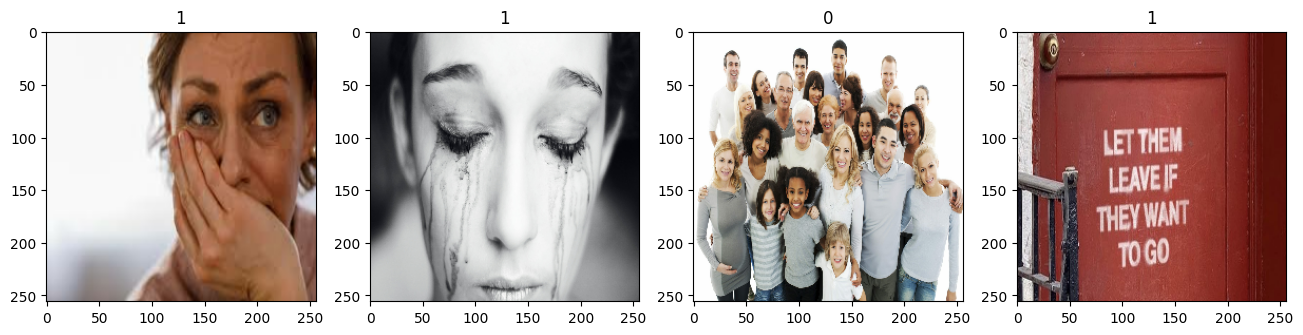

In [201]:
# this is a way to know which labels for which class
# plt non-scaled data
fig, ax = plt.subplots(ncols=4, figsize=(16,16)) # to plot 4 images in one line  fig size=(4* No of images)
for idx, img in enumerate(batch[0][:4]): # 4 images
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [202]:
data = data.map(lambda x,y: (x/255, y)) # map to apply particular transformation to th whole data

In [203]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [204]:
batch=data.as_numpy_iterator().next()

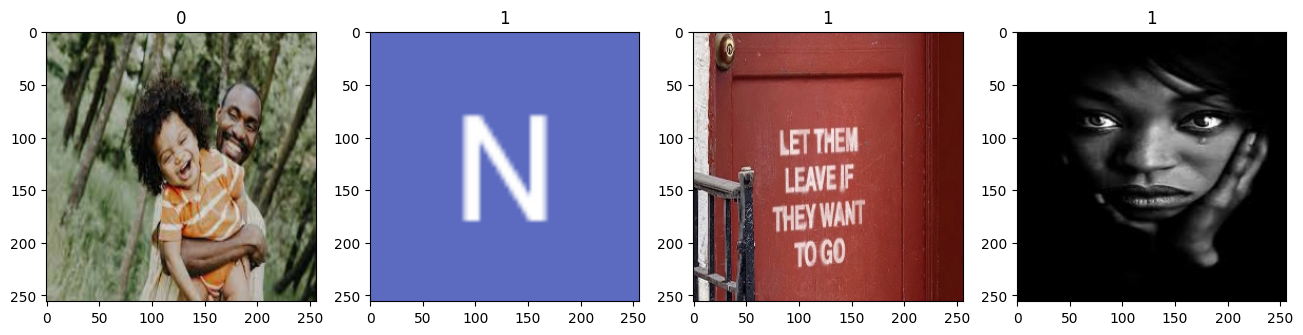

In [205]:
# this is a way to know which labels for which class
#plt scaled data
fig, ax = plt.subplots(ncols=4, figsize=(16,16)) # to plot 4 images in one line  fig size=(4* No of images)
for idx, img in enumerate(batch[0][:4]): # 4 images
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [206]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [207]:
train_size

7

In [208]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [209]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [361]:
model = Sequential()

In [362]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [363]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [364]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [365]:
logdir='logs' # log drirectory, this is realy useful if you wanted to save your model as a particular check point if you want to do some specific loggin

In [366]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# this is going to log out your model training as its training, so if you wanted to come back and see how your model performed did it vary at a particulat point int time do we need to drop our learning rate you're actually going to see that in side this boards but we can actually plot them using the history that you collect from your training step
 

In [367]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 920ms/step - loss: 1.1177 - accuracy: 0.5179 - val_loss: 0.7882 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 7s 547ms/step - loss: 0.6947 - accuracy: 0.5670 - val_loss: 0.6527 - val_accuracy: 0.7969
Epoch 3/20
7/7 [==============================] - 9s 705ms/step - loss: 0.6170 - accuracy: 0.7277 - val_loss: 0.5786 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 8s 904ms/step - loss: 0.5047 - accuracy: 0.8214 - val_loss: 0.4248 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 6s 538ms/step - loss: 0.3800 - accuracy: 0.8214 - val_loss: 0.2675 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 8s 613ms/step - loss: 0.2816 - accuracy: 0.8884 - val_loss: 0.2008 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 6s 528ms/step - loss: 0.2262 - accuracy: 0.9196 - val_loss: 0.1341 - val_accuracy: 0.9844
Epoch 8/20
7/7 [===

# 8. Plot Performance

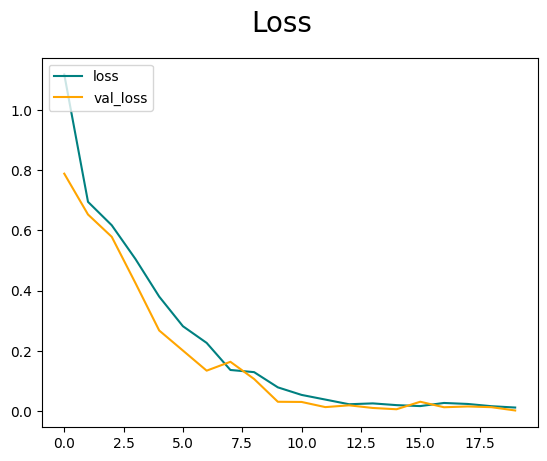

In [368]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

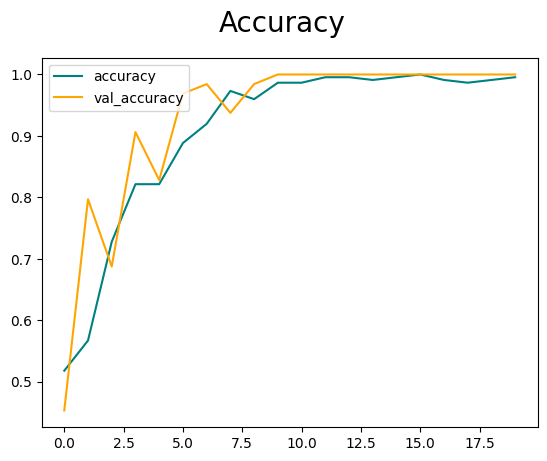

In [369]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [370]:
from keras.metrics import Precision, Recall, BinaryAccuracy # these are a different measures that you use  for classification problems

In [371]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [372]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 116ms/step


In [373]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [374]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, BinaryAccuracy: 1.0


# 10. Test

In [332]:
import cv2

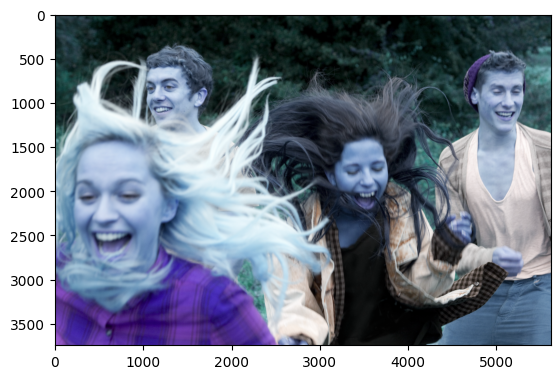

In [375]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

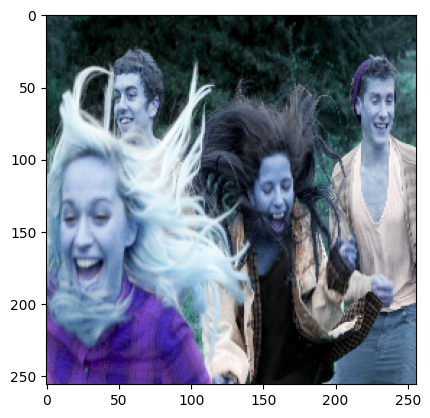

In [376]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [377]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [378]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # np.expand_dims because our nn expects us to pass through a batch of images not a single image

1/1 [==============================] - 0s 31ms/step


In [379]:
yhat

array([[0.00599997]], dtype=float32)

In [380]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


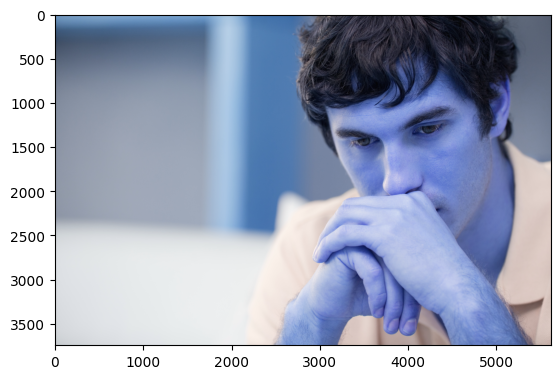

In [381]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()


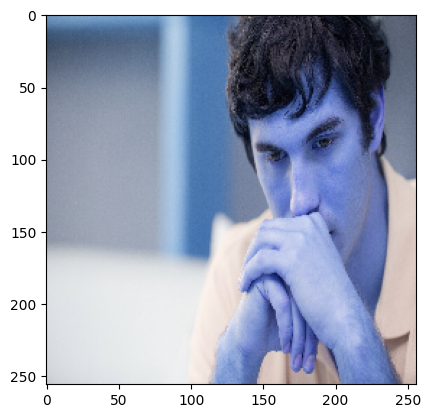

In [382]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [383]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.99744993]], dtype=float32)

In [384]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [385]:
from tensorflow.keras.models import load_model

In [386]:
model.save(os.path.join('models','imageclassifier.h5')) # saving as .h5 doing serialization, serializing the model onto something that we can store as a disk, it is similar to Zip a data setor wire a data set


In [387]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [388]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 77ms/step


array([[0.99744993]], dtype=float32)